In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load data
df = pd.read_csv("D:/Projects/Data cleaning process/netflix1.csv")


In [40]:
#Handle Missing Values
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unrated', inplace=True)

C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\22243781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\22243781.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
# Data Cleaning
# 1. Handle missing values
df.fillna({'director': 'Unknown', 'country': 'Unknown', 'rating': 'Unrated'}, inplace=True)

In [42]:
#Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [12]:
# 2. Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [14]:
# 3. Separate duration into numeric value and unit (minutes or seasons)
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\411864573.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)


In [16]:
# Data Visualization
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\1343323037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


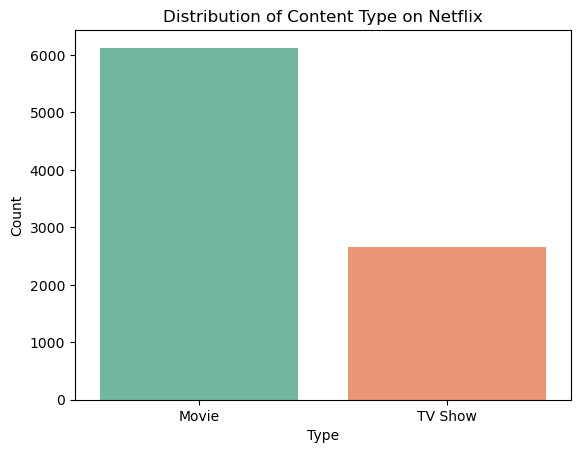

In [18]:
# 1. Distribution of content type
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\4136917263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set3')


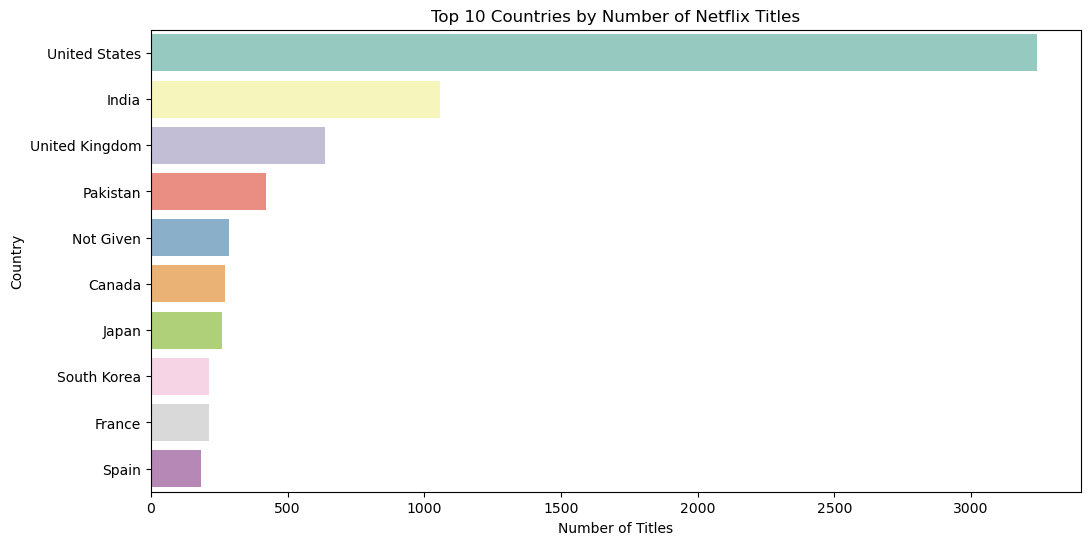

In [20]:
# 2. Top 10 countries by content count
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set3')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

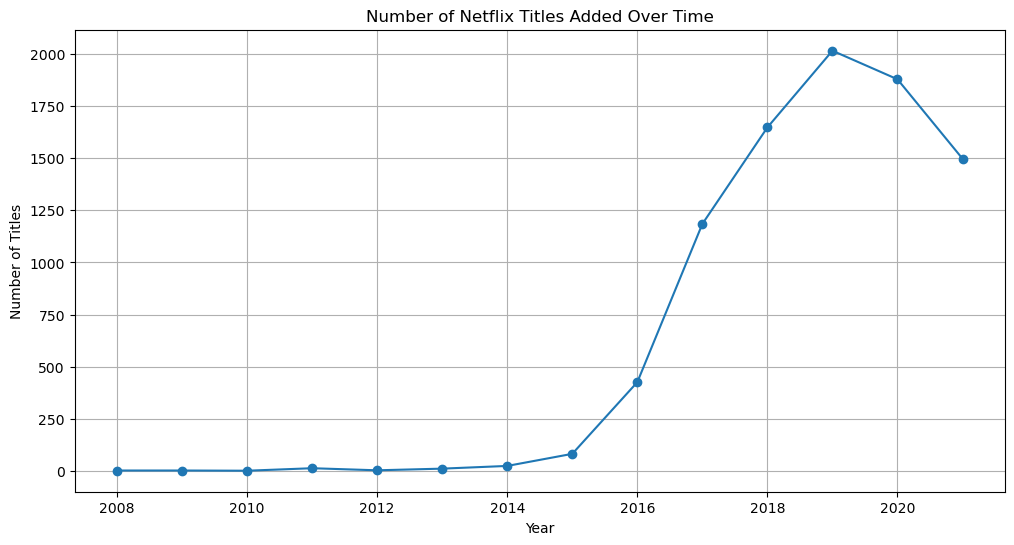

In [22]:
# 3. Content added over time
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
content_by_year.plot(kind='line', marker='o')
plt.title('Number of Netflix Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()

C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\3897466003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)


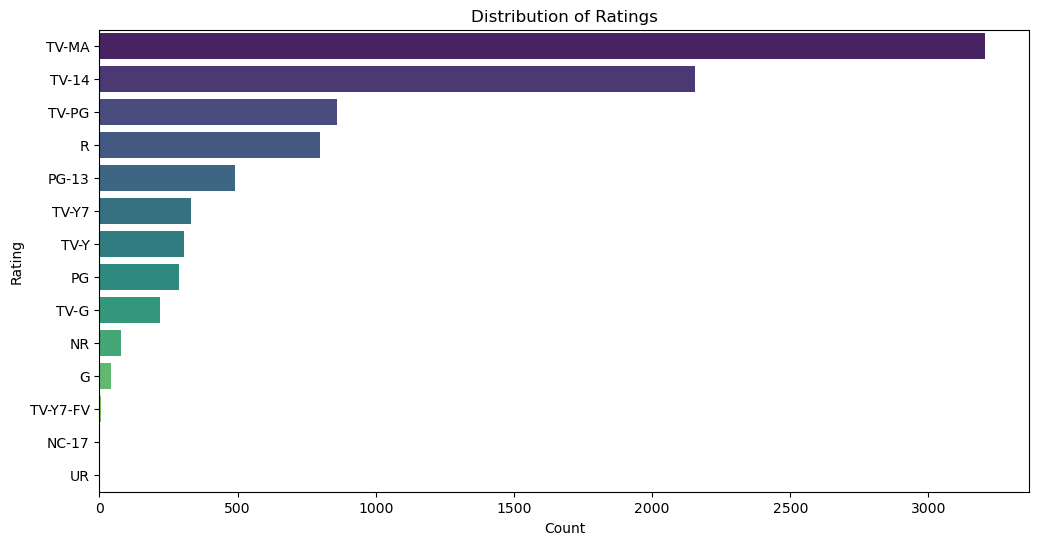

In [24]:
# 4. Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

C:\Users\M Vishnusankar\AppData\Local\Temp\ipykernel_33976\439871528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


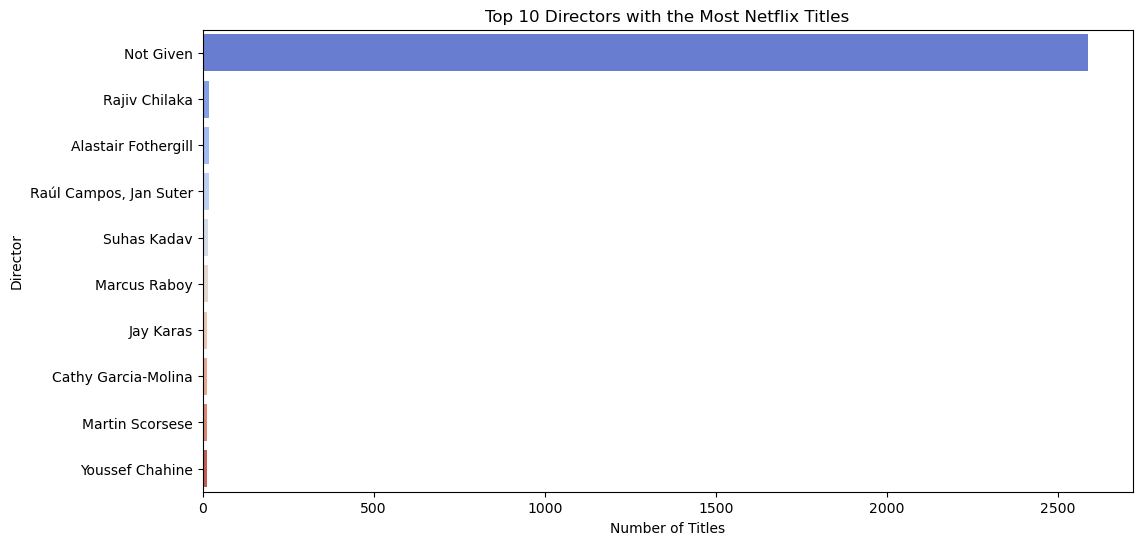

In [32]:
#Director Count Bar Plot (Top 10)
top_directors = df['director'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors with the Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


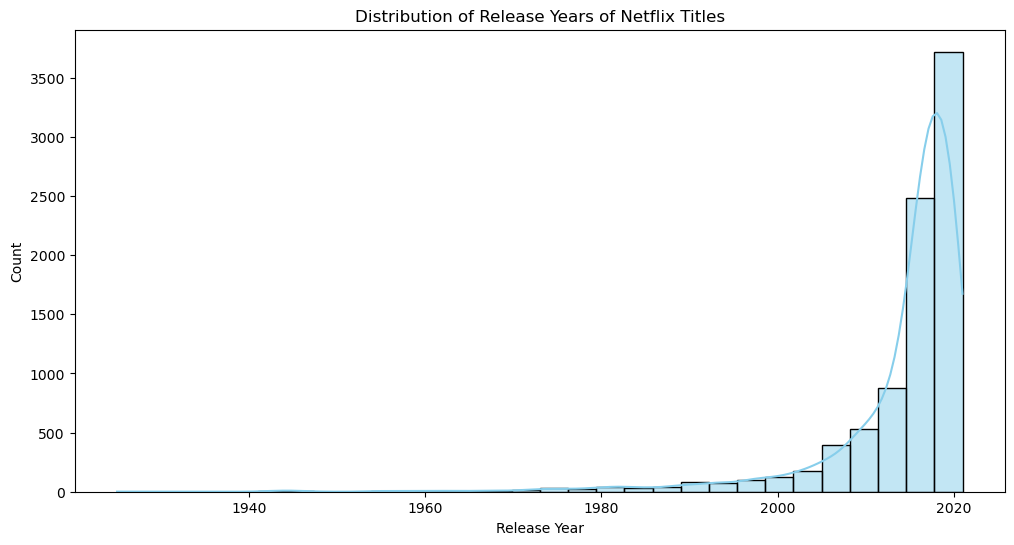

In [28]:
#Release Year Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Years of Netflix Titles')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


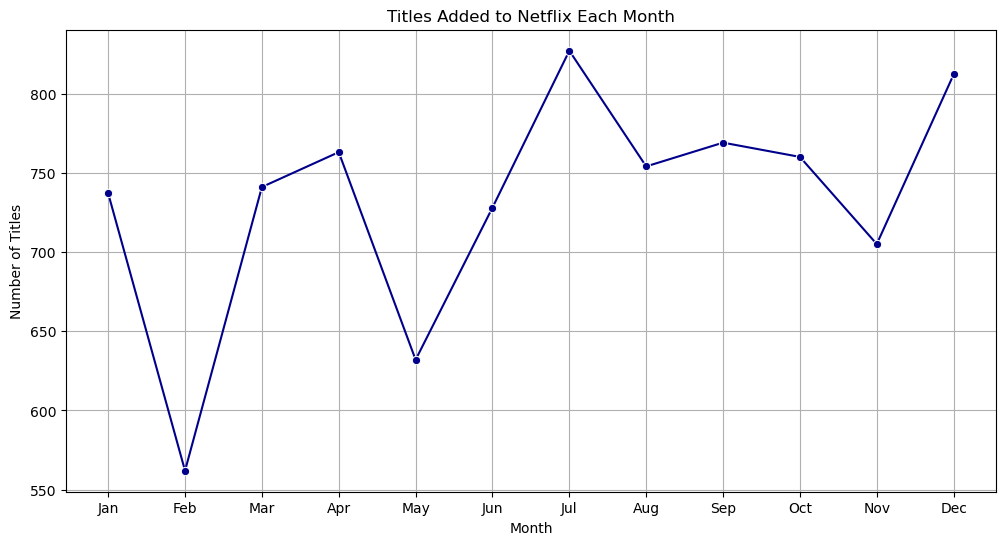

In [34]:
#Netflix Content Added Each Month
df['month_added'] = df['date_added'].dt.month
monthly_content = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_content.index, y=monthly_content.values, marker='o', color='darkblue')
plt.title('Titles Added to Netflix Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


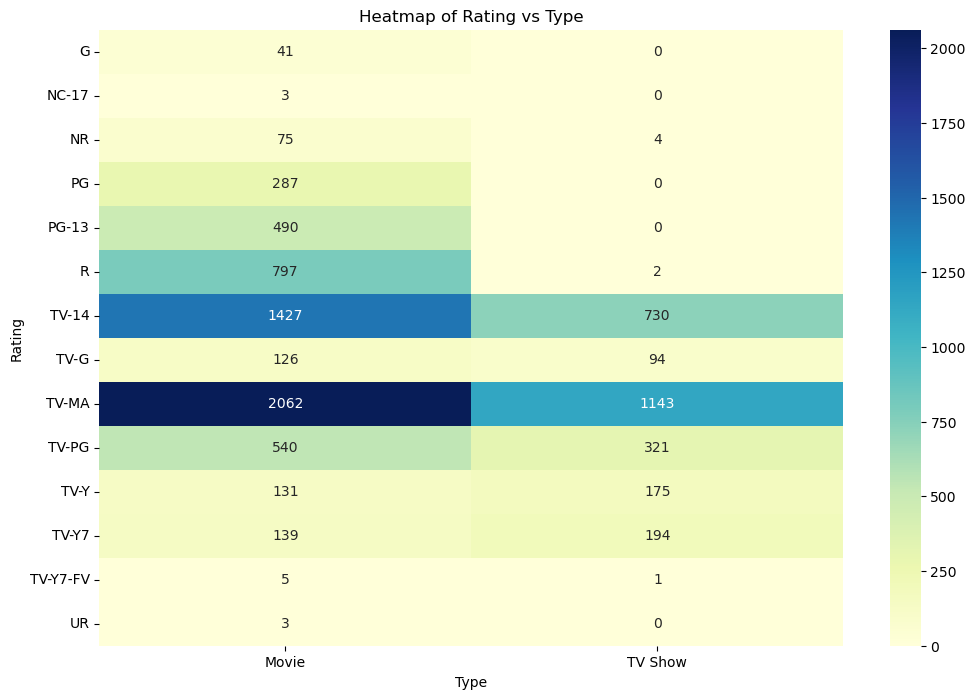

In [38]:
#Type vs. Rating Heatmap
rating_type_counts = pd.crosstab(df['rating'], df['type'])
plt.figure(figsize=(12, 8))
sns.heatmap(rating_type_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Rating vs Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()
